In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from xgboost import XGBClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras import layers, regularizers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.metrics import accuracy_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/knnwaladatasets/y_test.csv
/kaggle/input/knnwaladatasets/X_Test.csv
/kaggle/input/knnwaladatasets/y_val.csv
/kaggle/input/knnwaladatasets/y_train.csv
/kaggle/input/knnwaladatasets/X_train.csv
/kaggle/input/knnwaladatasets/X_val.csv
/kaggle/input/meta-learner-data/Meta_learner_data/meta_train_data.csv
/kaggle/input/meta-learner-data/Meta_learner_data/meta_test_data.csv
/kaggle/input/meta-learner-data/Meta_learner_data/Output_Predictions.csv
/kaggle/input/meta-learner-data/Meta_learner_data/Output_Predictions_test.csv


In [2]:
total_data=pd.concat([pd.read_csv("/kaggle/input/knnwaladatasets/X_val.csv"),pd.read_csv("/kaggle/input/meta-learner-data/Meta_learner_data/meta_train_data.csv")],axis=1)

In [3]:
X=total_data.drop('True Value',axis=1)
Y=total_data['True Value']

In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=69)
X_cv,X_test,Y_cv,Y_test=train_test_split(X_test,Y_test,test_size=0.5,random_state=69)

In [5]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define a simple feedforward network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(50,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile the model
# - Use 'sparse_categorical_crossentropy' if y_train is integer-encoded (0..9)
# - Use 'categorical_crossentropy' if y_train is one-hot encoded
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
model.compile(
    optimizer=Adam(learning_rate=0.00005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Example training
# X_train: shape (num_samples, 50)
# y_train: shape (num_samples,) with values in {0..9} for 10 classes
history=model.fit(
    X_train, Y_train,
    validation_data=(X_cv, Y_cv),  # optional validation set
    epochs=200,
    batch_size=8,
    verbose=1
)

Epoch 1/200


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1363 - loss: 2.5539 - val_accuracy: 0.6370 - val_loss: 1.7599
Epoch 2/200
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3654 - loss: 1.8608 - val_accuracy: 0.7858 - val_loss: 1.2327
Epoch 3/200
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5689 - loss: 1.4000 - val_accuracy: 0.8503 - val_loss: 0.8423
Epoch 4/200
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6959 - loss: 1.0587 - val_accuracy: 0.8714 - val_loss: 0.6173
Epoch 5/200
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7554 - loss: 0.8600 - val_accuracy: 0.8775 - val_loss: 0.5146
Epoch 6/200
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8064 - loss: 0.7026 - val_accuracy: 0.8824 - val_loss: 0.4652
Epoch 7/200
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8346 - loss: 0.6311 - val_accuracy: 0.8837 - val_loss: 0.4412
Epoch 8/200
855/855 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8495 - loss: 0.5807 - val_accuracy: 0.8867

In [20]:
import matplotlib.pyplot as plt

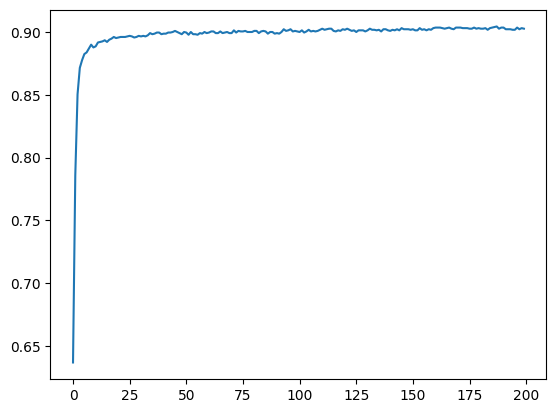

In [21]:
plt.plot(np.arange(len(history.history['val_accuracy'])),history.history['val_accuracy'])

In [22]:
accuracy_score(Y_test,model.predict(X_test).argmax(axis=1))

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.9091706888986397

In [23]:
accuracy_score(Y_cv,model.predict(X_cv).argmax(axis=1))

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


0.9025460930640913

In [25]:
model.save("Stacker-Model.h5")

In [24]:
import shap

In [13]:
import shap
import numpy as np

# Suppose 'model' is a trained Keras model, and X_sample is a subset of data
explainer = shap.PermutationExplainer(model, np.array(X_test))  # X_background is a small background set
shap_values = explainer.shap_values(np.array(X_cv))

PermutationExplainer explainer: 2279it [02:06, 17.11it/s]                          


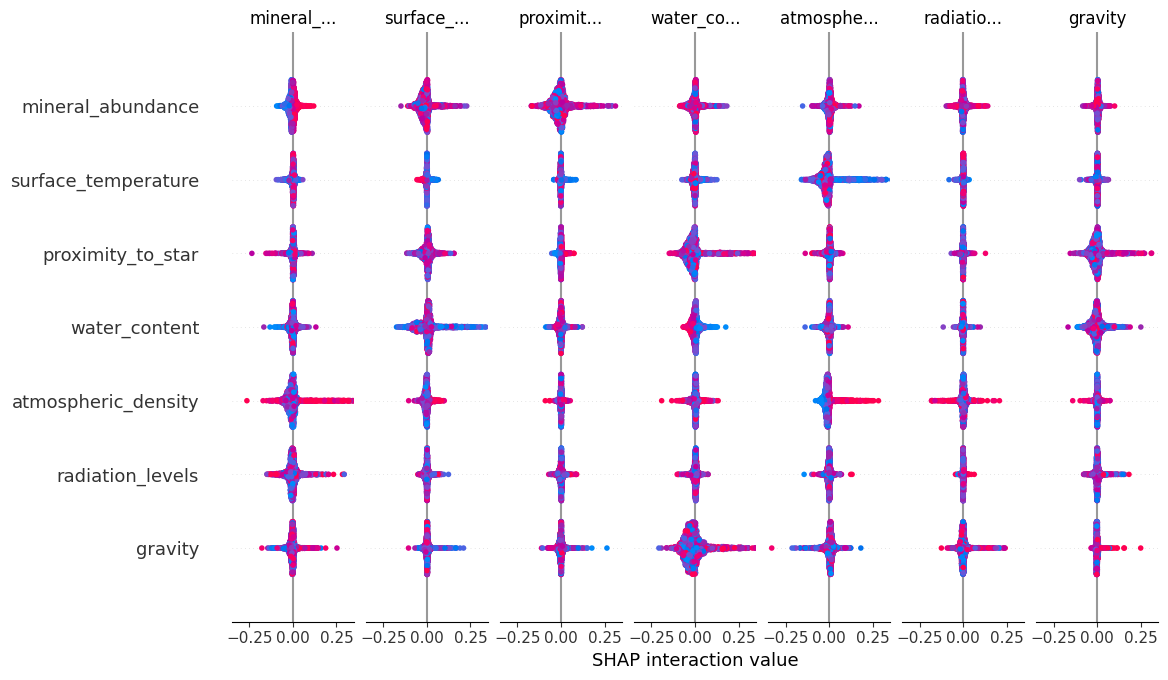

In [187]:
shap.summary_plot(shap_values, X_cv)

In [14]:
def plot_shap_feature_importance(shap_values, feature_names, title="Permutation Feature Importance"):
    """
    Summarizes and plots feature importance from a SHAP-like array, using provided feature names.

    Parameters
    ----------
    shap_values : np.ndarray
        - If shape == (n_samples, n_features), it's single-class/regression.
        - If shape == (n_samples, n_classes, n_features), it's multi-class.
          We'll sum across classes to get one importance score per feature.
    feature_names : list of str
        Names of each feature, length must match shap_values' last dimension.
    title : str, optional
        Title for the bar chart.
    """

    # 1) Ensure we have a 3D array: (n_samples, n_classes, n_features)
    #    If it's 2D, expand to (n_samples, 1, n_features).
    if shap_values.ndim == 2:
        shap_values = np.expand_dims(shap_values, axis=1)  # shape => (n_samples, 1, n_features)

    # Check length of feature_names
    n_samples, n_classes, n_features = shap_values.shape
    if len(feature_names) != n_features:
        raise ValueError(f"feature_names must have length {n_features}, got {len(feature_names)}")

    # 2) Sum the absolute SHAP values across classes => shape (n_samples, n_features)
    shap_per_sample = np.abs(shap_values).sum(axis=1)

    # 3) Sum across samples => shape (n_features,)
    feature_importance = shap_per_sample.sum(axis=0)

    # 4) Pair with feature names, then sort descending
    pairs = list(zip(feature_names, feature_importance))
    pairs.sort(key=lambda x: x[1], reverse=True)

    # 5) Separate into lists for plotting
    sorted_names = [p[0] for p in pairs]
    sorted_vals = [p[1] for p in pairs]

    # 6) Plot a horizontal bar chart (top = most important)
    plt.figure(figsize=(8, 6))
    plt.barh(sorted_names[::-1], sorted_vals[::-1], color='skyblue')
    plt.xlabel("Importance (sum of absolute SHAP values)")
    plt.title(title)
    plt.tight_layout()
    plt.show()


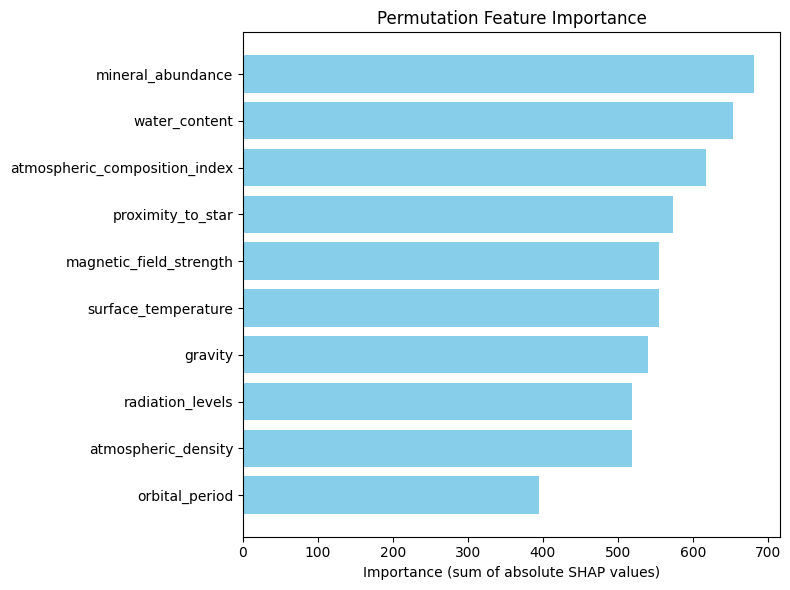

In [18]:
plot_shap_feature_importance(shap_values,pd.read_csv("/kaggle/input/knnwaladatasets/X_val.csv").columns)